In [32]:
import os, shutil
import warnings
warnings.filterwarnings('ignore')


In [34]:
# %pip install -q -U keras-tuner


In [35]:
# os.getcwd()

In [36]:


# original_dataset_dir = '/home/kailash/VScode Python projects/tf/conv/kaggle_dataset/train'


In [37]:

# base_dir = '/home/kailash/VScode Python projects/tf/conv/small_dataset/'

# os.mkdir(base_dir)



### Folders for train,test,validation data ###

In [38]:
# train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


In [39]:
# os.path(test_dir)

### Directory for cat and dog images for train test validation data ###

In [40]:
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

#### Copy from kaggle train dataset to their respective directories ####

In [41]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [42]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [43]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [44]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [45]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [46]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [47]:
import tensorflow as tf

In [48]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [49]:
import tensorflow as tf
from tensorflow import keras


In [50]:
import keras_tuner as kt

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

In [53]:

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,decay=1e-6),metrics=['acc'])

In [54]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/train',target_size = (150,150),batch_size =20,class_mode ='binary')
valid_generator = test_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/validation',target_size = (150,150),batch_size =20,class_mode ='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break



data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cats_dog",save_best_only=True)

In [57]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [58]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()


In [59]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [60]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=valid_generator,validation_steps=50,callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])

100/100 [==============================] - ETA: 0s - loss: 0.6926 - acc: 0.5290

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 15s 139ms/step - loss: 0.6926 - acc: 0.5290 - val_loss: 0.6863 - val_acc: 0.5060


In [61]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

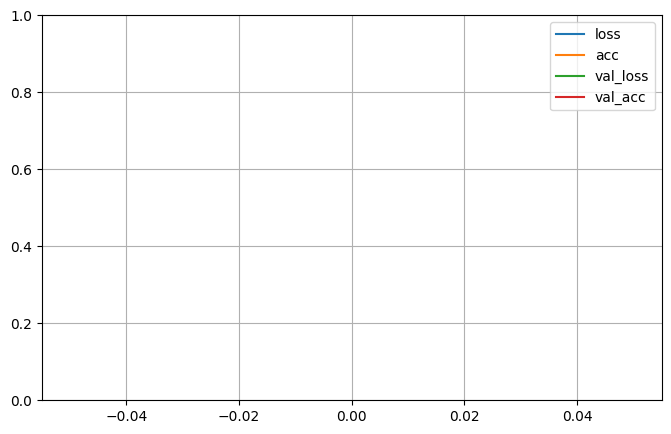

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [64]:
model.save("cats_and_dogs")

INFO:tensorflow:Assets written to: cats_and_dogs/assets


INFO:tensorflow:Assets written to: cats_and_dogs/assets


In [65]:
!tensorboard --logdir=./my_logs --port=6006

/bin/bash: /home/kailash/anaconda3/envs/tensorflow1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-09-19 14:23:09.726592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 14:23:09.875538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-19 14:23:10.421478: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64: